# === Personal Project ===
# eBay IPhone 14 Prices Prediction
This is a project for my Data Science Portofolio, currently ongoing.

Date: 11.27.2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set up pandas
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)

# 1. Load Dataframe
-> iPhone 14 Pro Max Prices

In [3]:
df = pd.read_csv('data/ebay_iphone_14_pro_max.csv')

## 2. Data Preprocessing

In [4]:
df

,Title,Price
0,Apple iPhone 14 Pro Max 512GB Unlocked AT&T T-Mobile Verizon Very Good Condition,$884.95
1,Case For iPhone 15 Pro Max 14 Plus 13 12 11 XS Shockproof Full Protective Cover,$2.48 to $6.22
2,Apple iPhone 14 Pro Max A16 128GB 256GB 512GB 1TB Unlocked New Sealed,"$1,429.49 to $2,089.49"
3,Apple iPhone 14 Pro Max 256GB ( Unlocked) US E Sim - Excellent,$909.99
4,Apple iPhone 14 Pro Max - 128GB - Deep Purple (Unlocked) Smartphone,$810.00
...,...,...
1018,Apple iPhone 14 Pro Max - 256GB - Space Black (Unlocked) A2651 (GSM),$940.00
1019,Apple iPhone 14 Pro Max - 128GB - Gold (Verizon),$950.00
1020,iphone 14 pro max 128gb silver unlocked,"$1,008.98"
1021,Apple iPhone 14 Pro Max - 1TB - Deep Purple (T-Mobile),"$1,300.00"


In [5]:
df.dtypes

Title    object
Price    object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   1023 non-null   object
 1   Price   1023 non-null   object
dtypes: object(2)
memory usage: 16.1+ KB


### 2.1. Data Cleaning

In [7]:
# drop all rows that contains price range (not only 1 iphone)
df = df.drop(df.loc[df['Price'].str.contains('to')].index)

In [8]:
# delete $ and replace , with .
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '').replace(',',''))

# convert to numeric
df['Price'] = pd.to_numeric(df['Price'])

In [9]:
df.dtypes

Title     object
Price    float64
dtype: object

In [10]:
df.describe()

,Price
count,994.000000
mean,1029.030885
std,1235.541807
min,3.720000
25%,750.000000
50%,906.990000
75%,1121.090000
max,35000.000000


## Removing outliers

C:\Users\azhar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\azhar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\azhar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


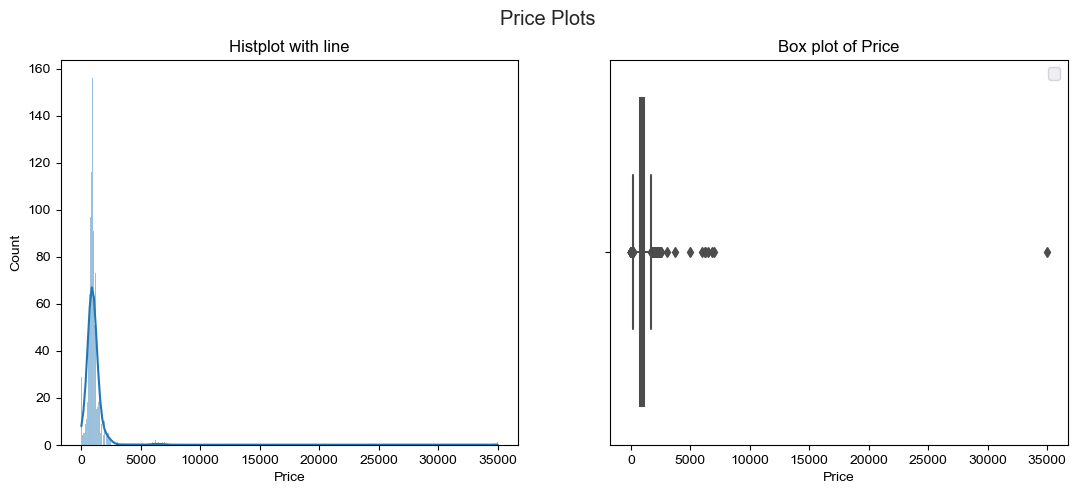

In [11]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13,5))
sns.set_theme()
fig.suptitle('Price Plots')
sns.histplot(ax=axes[0], data=df, x=df['Price'], kde=True)
axes[0].set_title('Histplot with line')
sns.boxplot(ax=axes[1], data=df, x=df['Price'])
axes[1].set_title('Box plot of Price')
plt.legend()
plt.show()

In [12]:
df.describe()

,Price
count,994.000000
mean,1029.030885
std,1235.541807
min,3.720000
25%,750.000000
50%,906.990000
75%,1121.090000
max,35000.000000


In [13]:
# remove crazy prices
df = df.drop(df.loc[(df.Price > 1700) | (df.Price < 400)].index)

In [14]:
df.shape

(883, 2)

C:\Users\azhar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\azhar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\azhar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


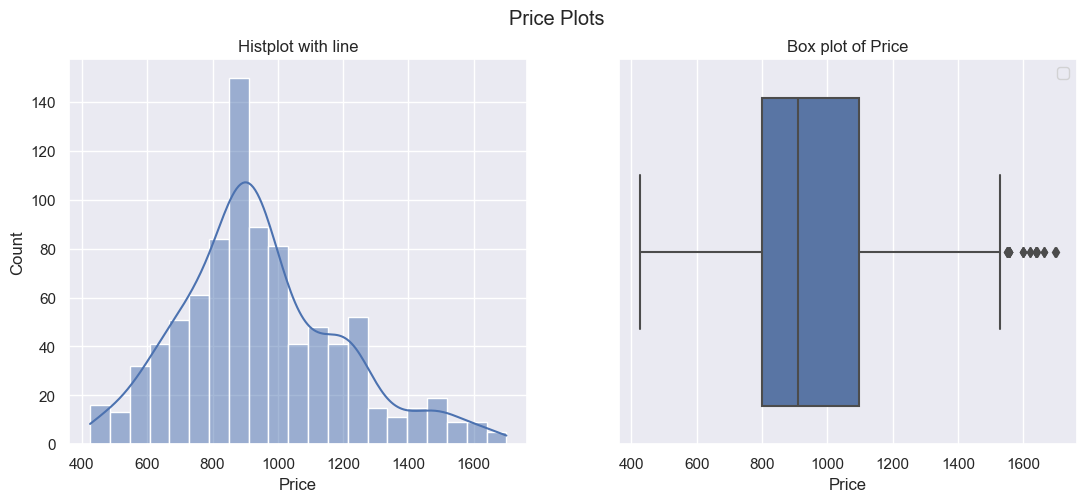

In [15]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13,5))
sns.set_theme()
fig.suptitle('Price Plots')
sns.histplot(ax=axes[0], data=df, x=df['Price'], kde=True)
axes[0].set_title('Histplot with line')
sns.boxplot(ax=axes[1], data=df, x=df['Price'])
axes[1].set_title('Box plot of Price')
plt.legend()
plt.show()

In [16]:
df.describe()

,Price
count,883.000000
mean,948.038992
std,247.308520
min,425.000000
25%,799.470000
50%,909.000000
75%,1098.230000
max,1700.000000


In [17]:
## Remove price outliers
## TODO: Improve outlier algorithm


# remove if Z-Score more than 3 for upper-bound, and -1.5 for lower bound

# add zscore column
df['zscore'] = (df.Price - df.Price.mean())/df.Price.std()



In [18]:
df.loc[df.zscore > 2.5]

,Title,Price,zscore
229,Apple iPhone 14 Pro Max 256GB Gold UNLOCKED SIM CARD TRAY MQ9W3ZP/A Model A2894,1597.97,2.628017
230,Apple iPhone 14 Pro Max 512GB (Deep Purple) NEW **Sealed** UNLOCKED BARGAIN!!,1662.94,2.890725
269,Apple iPhone 14 Pro Max - 256GB - Deep Purple (Unlocked),1599.00,2.632182
298,Apple iPhone 14 Pro Max 512GB (Deep Purple) NEW **Sealed** UNLOCKED BARGAIN!!,1662.94,2.890725
368,Apple iPhone 14 Pro Max - 256GB - Gold (Unlocked) Apple iPhone 14 Pro Max New US,1599.00,2.632182
468,Apple iPhone 14 Pro Max - 256GB - Space Black (Unlocked) (CA),1643.02,2.810178
727,Apple - iPhone 14 Pro Max -128GB - Factory Sealed - Factory Warranty - UNLOCKED!,1696.00,3.024405
750,"Apple iPhone 14 Pro Max - 1TB - Gold (Unlocked) Barely Used, 3 cases, Apple Care",1619.35,2.714468
764,Apple - iPhone 14 Pro Max -1TB - Factory Sealed - Factory Warranty - UNLOCKED!,1700.00,3.040579
825,"Apple iPhone 14 Pro Max - 1TB - Gold (Unlocked) Barely Used, 3 cases, Apple Care",1619.35,2.714468


In [19]:
df.loc[df.zscore < -2]

,Title,Price,zscore
32,NEW LISTINGApple iPhone 14 Pro Max A2651 256GB Purple,425.00,-2.114925
34,Verizon Apple iPhone 14 Pro Max A2651 Silver Broken Parts Only READ DESCRIPTION,435.00,-2.074490
76,Apple iPhone 13 Pro Gold ic locked Very Good Condition And Iphone 11 128gb Read,450.00,-2.013837
100,Apple iPhone 14 Pro Max - Silver (Unlocked) cracked screen,435.98,-2.070527
172,Apple iPhone 14 Pro Max 128GB Space Black Spectrum Locked - Cracked Front/Back,449.99,-2.013877
197,Apple iPhone 14 Pro Max 256GB Silver AT&T Locked - LCD Lines,449.99,-2.013877
378,Apple iPhone 14 Pro Max 128gb Black,429.00,-2.098751
477,Apple iPhone 14 Pro Max 128gb Black,429.00,-2.098751
486,Apple iPhone 14 Pro Max - 256GB (AT&T ONLY) BAD LCD - READ (#K22),431.99,-2.086661
551,Apple iPhone 14 Pro Max - 128GB - Space Black (AT&T) ESN BD,450.00,-2.013837


In [20]:
# drop columns with zscore > 3 and < -2.5
df = df.drop(df.loc[(df.zscore > 3) | (df.zscore < -2.5)].index)


C:\Users\azhar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\azhar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\azhar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


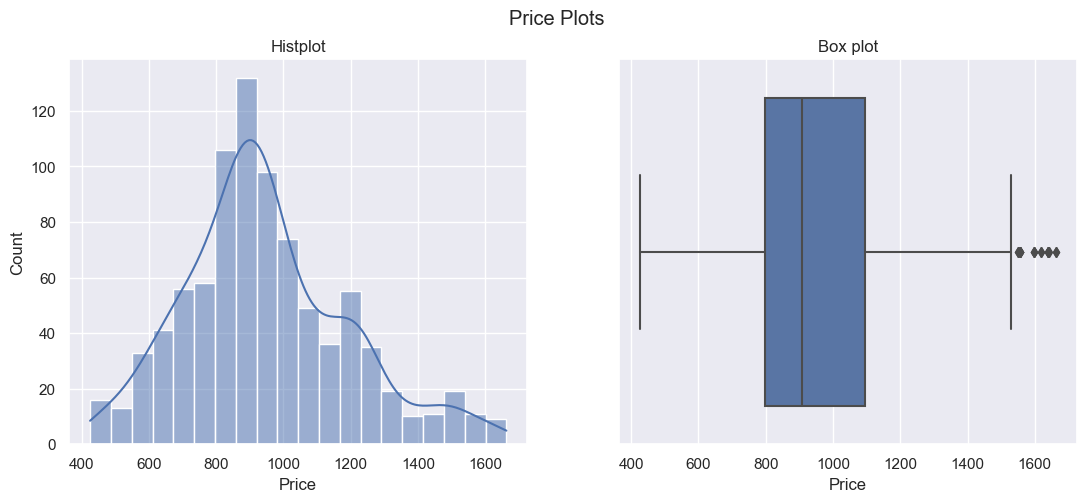

In [21]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13,5))
sns.set_theme()
fig.suptitle('Price Plots')
sns.histplot(ax=axes[0], data=df, x=df['Price'], kde=True)
axes[0].set_title('Histplot')
sns.boxplot(ax=axes[1], data=df, x=df['Price'])
axes[1].set_title('Box plot')


plt.show()

In [22]:
df = df.reset_index().drop(columns=['index', 'zscore'])

In [23]:
df.describe()

,Price
count,881.000000
mean,946.336470
std,244.988409
min,425.000000
25%,799.000000
50%,906.990000
75%,1096.160000
max,1662.940000


## 3. Feature Engineering

what affects the prices of the iPhone?
Based on the Title Column of df.
1. Condition:
    Damaged = 3, 
    Good = 2, 
    Very Good / Excellent = 1, 
    Brand New = 0
    
2. Storage: 1TB = 0, 512GB = 1, 256GB = 2, 128GB = 3
3. IMEI: if has check imei, prices may be less (needs to be compared)
4. ESN: if has check ESN or bad ESN, prices may be less
3. Color (?)
4. Unlocked -> A factory unlock for your iPhone lets you swap out your current service carrier for a new carrier or several.
    Unlocked tends to be more expensive.
    
Goals: Make new Column based on the categories that affected the prices.

In [24]:
df['Title'] = df['Title'].str.lower() 
# make all lower case for easier cleaning

In [25]:
# 1 if unlocked else 0
df['carrier_lock'] = df['Title'].apply(lambda x: 1 if 'unlocked' in x else 0)

In [26]:
# Condition column function

def check_words_exist(item_name):
    # make a condition word list and categorize them
    damaged_cond_word = ['cracked', 'broken', 'scratch','damage', 'bad', 'crack', 'dead']
    good_cond_word = ['good', 'fair']
    excellent_cond_word = ['excellent', 'very', 'pretty']
    brand_new_word = ['brand', 'new', 'brandnew', 'sealed']
    parts = ['spare', 'parts']
    words = item_name.split()
   
    if any(w in words for w in damaged_cond_word):
        return 3
    
    elif any(w in words for w in brand_new_word):
        return 0
    
    elif any(w in words for w in parts):
        return 4
    
    elif any(w in words for w in excellent_cond_word):
        return 1
    
    elif any(w in words for w in good_cond_word):
        # add extra condition
        if any(w in words for w in excellent_cond_word):
            return 1
        return 2
    
    # if anything else not inside, return good condition
    else:
        if df.loc[df.Title == item_name].Price.values[0] < 800:
            return 2
        return 1
    

In [27]:
df['cond'] = df['Title'].apply(check_words_exist)

### Size of IPhone

In [28]:
df.loc[df.Title.str.contains('1tb')]

,Title,Price,carrier_lock,cond
22,"new listingbrand new apple iphone 14 pro max, space black, 1tb (applecare+ replacement)",1071.26,0,0
35,apple iphone 14 pro max 1tb bundle - space black factory unlocked,810.00,1,1
37,new apple iphone 14 pro max 5g • at&t/verizon/t-mobile • 128gb/256gb/512gb/1tb,799.99,0,0
52,new listingiphone 14 pro max 1tb deep purple,747.39,0,0
89,apple iphone 14 pro max 1tb space black unlocked very good condition,949.99,1,1
...,...,...,...,...
863,apple iphone 14 pro max - 1tb - space black (unlocked),1350.00,1,1
871,apple iphone 14 pro - 1tb - purple (unlocked) / 1 year applecare,1399.99,1,1
873,apple iphone 14 pro max - 1tb - deep purple (verizon) brand new,1500.00,0,0
875,apple iphone 14 pro max 128gb 256gb 512gb 1tb unlocked cdma+gsm excellent,1450.00,1,1


In [29]:
# take the phone storage size and drop na
df['storage'] = df['Title'].str.extract(r'(\d+tb|\d+gb|\d+\s?gb|\d+\s?tb)')

In [30]:
# drop nulls
df = df.dropna()

In [31]:
# check for null
df.loc[df['storage'].isnull()]

,Title,Price,carrier_lock,cond,storage


In [32]:
# convert storage to float and make it categorical

df['storage'] = df['storage'].apply(lambda x: x.replace('gb', '').replace('tb', ''))

In [33]:
def storage(x):
    if x == '1':
        return 0
    elif x == '512':
        return 1
    elif x == '256':
        return 2
    else:
        return 3
    
df['storage'] = df['storage'].apply(storage)

In [34]:
df['storage']

0      1
1      2
2      3
3      3
4      2
      ..
876    2
877    3
878    3
879    0
880    3
Name: storage, Length: 858, dtype: int64